In [1]:
#system libraries
import sys
import os

#some cool libraries
import scipy
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
from VSTProcessor import isMono, convert_to_float, convert_float_to_other_type

In [81]:
PATH = 'samples/Processed/'
TRIM_FRONT = True
TROM_BEHIND = True
ON_THRESHOLD = -55 #dB
OFF_THRESHOLD = -65 #dB

In [3]:
for root, dirs, files in os.walk(PATH, topdown=False):
    for name in files:
        inputfilepath = os.path.join(root, name)
        print(inputfilepath)

samples/Processed/1993 Hot Solo Rig\Playable\Guitar Solo Short Hold Mono\Solo Guitar Short Hold A#1.wav
samples/Processed/1993 Hot Solo Rig\Playable\Guitar Solo Short Hold Mono\Solo Guitar Short Hold A#2.wav
samples/Processed/1993 Hot Solo Rig\Playable\Guitar Solo Short Hold Mono\Solo Guitar Short Hold A1.wav
samples/Processed/1993 Hot Solo Rig\Playable\Guitar Solo Short Hold Mono\Solo Guitar Short Hold A2.wav
samples/Processed/1993 Hot Solo Rig\Playable\Guitar Solo Short Hold Mono\Solo Guitar Short Hold B1.wav
samples/Processed/1993 Hot Solo Rig\Playable\Guitar Solo Short Hold Mono\Solo Guitar Short Hold B2.wav
samples/Processed/1993 Hot Solo Rig\Playable\Guitar Solo Short Hold Mono\Solo Guitar Short Hold C#2.wav
samples/Processed/1993 Hot Solo Rig\Playable\Guitar Solo Short Hold Mono\Solo Guitar Short Hold C#3.wav
samples/Processed/1993 Hot Solo Rig\Playable\Guitar Solo Short Hold Mono\Solo Guitar Short Hold C2.wav
samples/Processed/1993 Hot Solo Rig\Playable\Guitar Solo Short Hold M

In [4]:
rate, data = scipy.io.wavfile.read(inputfilepath)

In [7]:
if isMono(data):
    isStereo = False
    data,olddatatype = convert_to_float(data)
else:
    isStereo = True
    dataL,olddatatype = convert_to_float(data[:,0])
    dataR,olddatatype = convert_to_float(data[:,1])

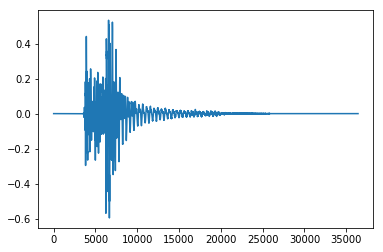

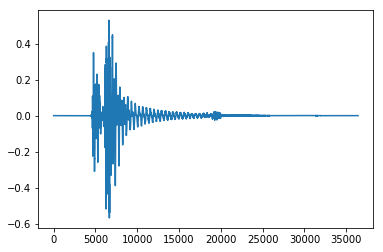

In [8]:
# Plot Waveform
if not isStereo:
    plt.plot(data)
else:
    plt.figure()
    plt.plot(dataL)
    plt.figure()
    plt.plot(dataR)

### Have a look on some features that may help us

##### Energy

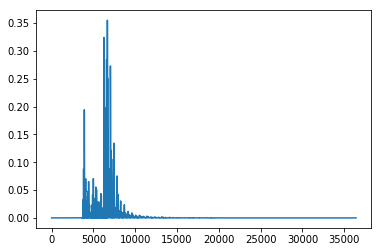

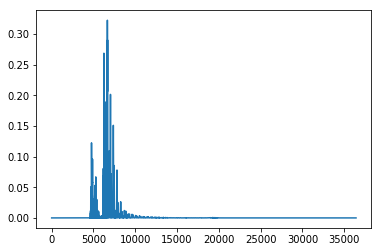

In [11]:
# Calculate Energy per sample
if not isStereo:
    Edata = np.square(data)
else:
    EdataL = np.square(dataL)
    EdataR = np.square(dataR)
# Plot Energy
if not isStereo:
    plt.plot(Edata)
else:
    plt.figure()
    plt.plot(EdataL)
    plt.figure()
    plt.plot(EdataR)

##### Delta

In [29]:
#Calculate Delta
deltaL=np.zeros(dataL.shape)
deltaR=np.zeros(dataR.shape)
for n in range(2,dataL.shape[0]):
    deltaL[n]=dataL[n]-dataL[n-1]
    deltaR[n]=dataR[n]-dataR[n-1]

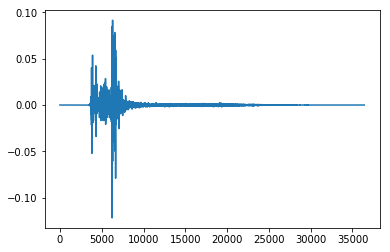

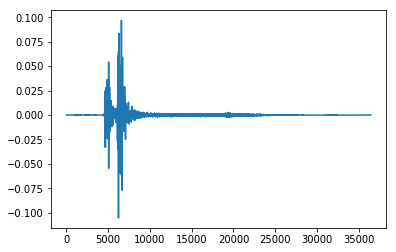

In [30]:
# Plot Delta
if not isStereo:
    plt.plot(delta)
else:
    plt.figure()
    plt.plot(deltaL)
    plt.figure()
    plt.plot(deltaR)

##### Log

d:\codingworkspace\pythonaudioprocessing\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
d:\codingworkspace\pythonaudioprocessing\venv\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


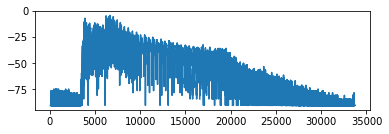

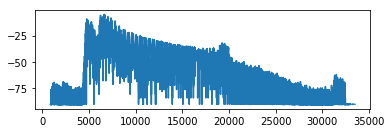

In [40]:
#Calculate Log
if not isStereo:
    log =20*np.log10(np.abs(data))
else:
    logL=20*np.log10(np.abs(dataL))
    logR=20*np.log10(np.abs(dataR))

In [ ]:
# Plot Log
if not isStereo:
    plt.plot(log)
else:
    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1)
    ax.plot(logL)
    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1)
    ax.plot(logR)

##### Delta (Delta) Log

In [43]:
#Calculate Delta
deltaLogL=np.zeros(logL.shape)
deltaLogR=np.zeros(logR.shape)
deltadeltaLogL=np.zeros(logL.shape)
deltadeltaLogR=np.zeros(logR.shape)
for n in range(2,logL.shape[0]):
    deltaLogL[n]=logL[n]-logL[n-1]
    deltaLogR[n]=logR[n]-logR[n-1]
    deltadeltaLogL[n]=deltaLogL[n]-deltaLogL[n-1]
    deltadeltaLogR[n]=deltaLogR[n]-deltaLogR[n-1]

d:\codingworkspace\pythonaudioprocessing\venv\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in float_scalars
  import sys
d:\codingworkspace\pythonaudioprocessing\venv\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in float_scalars
  


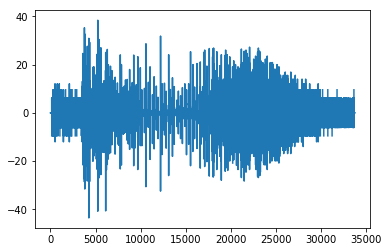

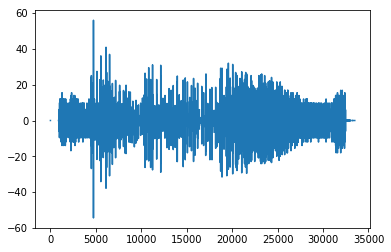

In [44]:
# Plot Delta
if not isStereo:
    plt.plot(deltaLog)
else:
    plt.figure()
    plt.plot(deltaLogL)
    plt.figure()
    plt.plot(deltaLogR)

##### Log Thresholding

In [79]:
if not isStereo:
    threshLogIdx = np.where(log>ON_THRESHOLD)
    OffthreshLogIdx = np.where(log>OFF_THRESHOLD)
    firstThresh = threshLogLIdx[0][0]
    lastThresh  = OffthreshLogIdx[0][-1]
else:
    threshLogLIdx = np.where(logL>ON_THRESHOLD)
    threshLogRIdx = np.where(logR>ON_THRESHOLD)
    OffthreshLogLIdx = np.where(logL>OFF_THRESHOLD)
    OffthreshLogRIdx = np.where(logR>OFF_THRESHOLD)
    firstThreshL = threshLogLIdx[0][0]
    firstThreshR = threshLogRIdx[0][0]
    lastThreshL  = OffthreshLogLIdx[0][-1]
    lastThreshR  = OffthreshLogRIdx[0][-1]
    firstThresh = min(firstThreshL,firstThreshR)
    lastThresh = max(lastThreshL,lastThreshR)


### Trim

In [ ]:
if TRIM_FRONT:
    if not isStereo:
        data = data[firstThresh:]
    else:
        dataL = dataL[firstThresh:]
        dataR = dataR[firstThresh:]
if TROM_BEHIND:
    if not isStereo:
        data = data[:lastThresh]
    else:
        dataL = dataL[:lastThresh]
        dataR = dataR[:lastThresh]

### Save

In [85]:
if not isStereo:
    data = convert_float_to_other_type(data, olddatatype)
    outputdata = data.T
else:
    dataL = convert_float_to_other_type(dataL, olddatatype)
    dataR = convert_float_to_other_type(dataR, olddatatype)
    outputdata = np.array([dataL, dataR]).T

In [84]:
#save to same file
scipy.io.wavfile.write(inputfilepath, rate, outputdata)

NameError: name 'rateL' is not defined